# **Data Analysis**

**Importing DataFrame**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, roc_curve, auc

**Loading Dataset**

In [27]:
df = pd.read_csv("medical_insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## **Preprocessing Data**

In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
#get_dummies to strings, sex, smoker and region and concat with original df
df_dummied = pd.concat([df, pd.get_dummies(df[['sex', 'smoker', 'region']])], axis=1)

In [31]:
#drop the columns that i get_dummied
df_dummied.drop(columns=['sex', 'smoker', 'region'], inplace=True)

In [32]:
df_dummied.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


## **EDA (Exploratory Data Analysis)**

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


The dataset contains 2,772 entries across 7 columns, focusing on individual medical costs billed by health insurance. The key variable of interest, "charges," is a continuous float value, reflecting the insurance cost associated with each individual. The dataset spans a broad age range, notably featuring a significant number of individuals between 18 to 22.5 years, predominantly male. Most have fewer than three children, and the bulk falls within a BMI range indicating overweight to moderate obesity (29.26 to 31.16). The data encompasses four regions (northeast, northwest, southeast, and southwest), with a higher prevalence of smokers in the southeast. This analysis aims to explore how age, sex, BMI, children, smoking status, and region influence insurance costs, with a keen interest in statistical correlations and patterns that may emerge.

**Importing necessary libraries**

**Distribution of Demographic and Behavioral Characteristics**

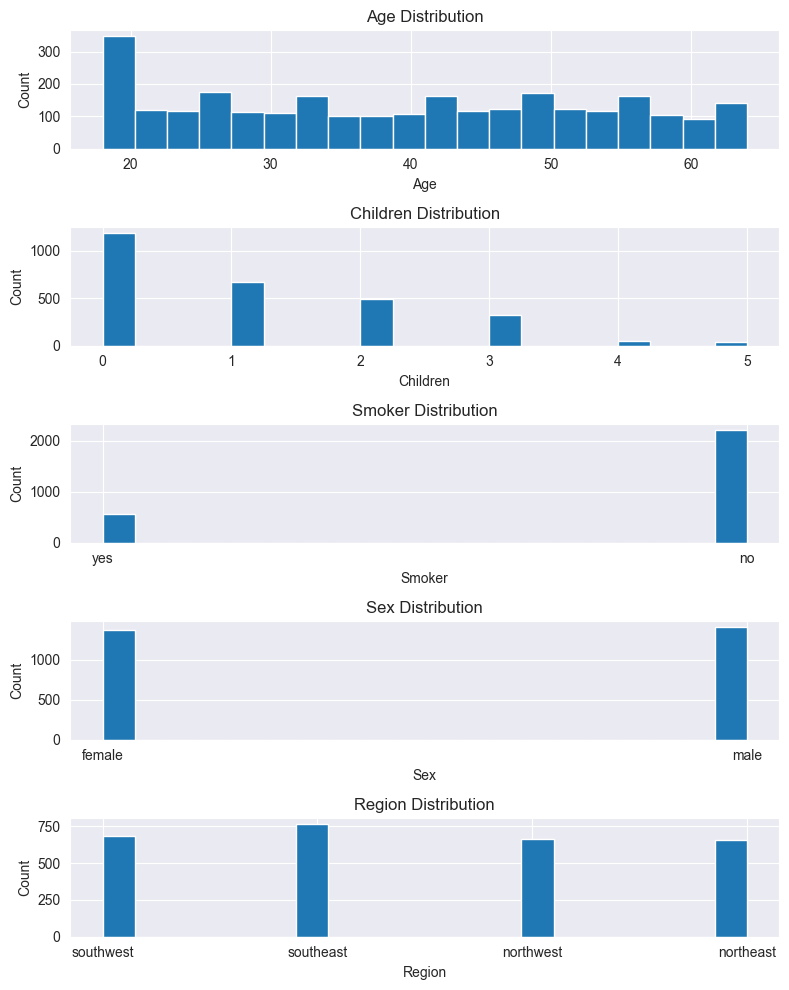

In [34]:
#Subplots with hist
fig, axs = plt.subplots(5, figsize=(8,10))

axs[0].hist(df['age'], bins=20)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

axs[1].hist(df['children'], bins=20)
axs[1].set_title('Children Distribution')
axs[1].set_xlabel('Children')
axs[1].set_ylabel('Count')

axs[2].hist(df['smoker'], bins=20)
axs[2].set_title('Smoker Distribution')
axs[2].set_xlabel('Smoker')
axs[2].set_ylabel('Count')

axs[3].hist(df['sex'], bins=20)
axs[3].set_title('Sex Distribution')
axs[3].set_xlabel('Sex')
axs[3].set_ylabel('Count')

axs[4].hist(df['region'], bins=20)
axs[4].set_title('Region Distribution')
axs[4].set_xlabel('Region')
axs[4].set_ylabel('Count')

plt.tight_layout()

plt.show()

These plots collectively offer insights into the demographics and behaviors of the individuals in the dataset, highlighting the prevalence of younger individuals, the tendency towards smaller family sizes, the lower smoking rates, a balanced gender distribution, and an even regional spread. Such visualizations are critical for understanding the dataset's composition and guiding further analysis on how these factors might influence insurance charges.

## **What are the primary factors influencing medical expenses?**

**Heatmap**

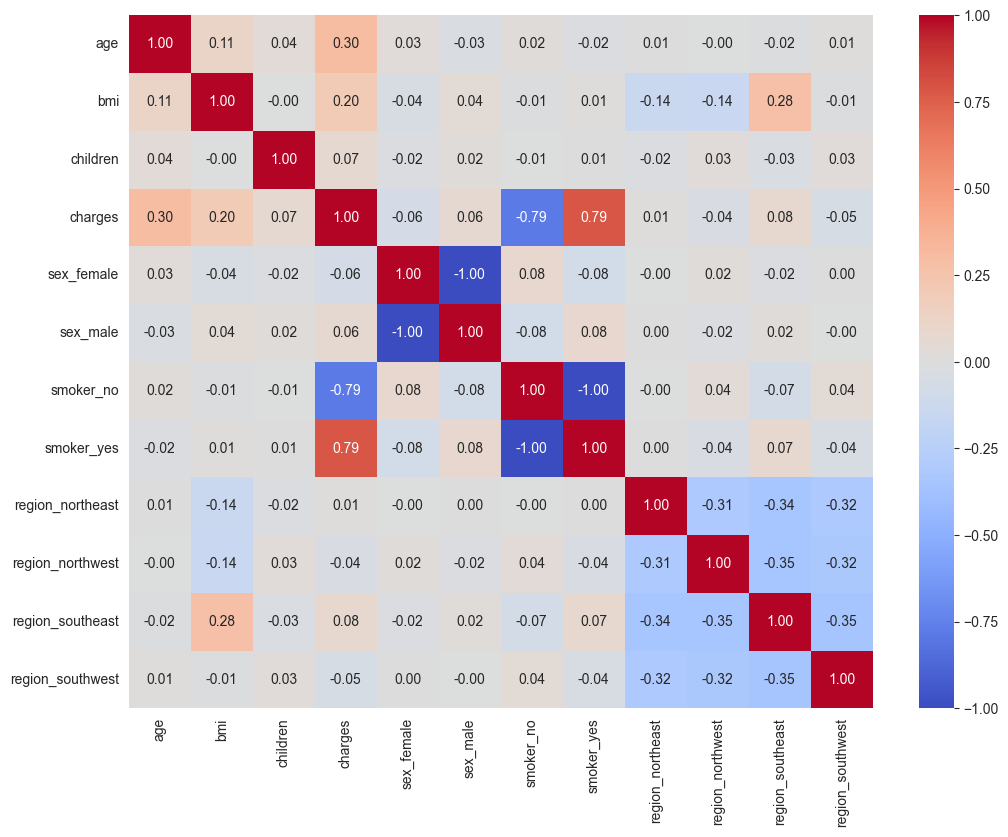

In [35]:
plt.figure(figsize=(12,9))
sns.heatmap(df_dummied.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The observations from the analysis reveal several key insights into the factors influencing insurance charges. The most striking correlation is found between smoking status and charges, indicating a substantial increase in insurance costs for smokers due to their higher health risks. This aligns with established knowledge regarding the detrimental health effects of smoking. Additionally, age and BMI also exhibit positive correlations with charges, reflecting the expected higher medical expenses associated with older age and increased BMI levels. While regional differences show some correlation with charges, their impact appears to be less significant compared to smoking, age, and BMI. Surprisingly, gender and the number of children show minimal correlation with charges, suggesting these factors have little influence on insurance costs in this dataset. Overall, these findings emphasize the critical role of lifestyle choices and demographic characteristics in determining health insurance premiums, providing valuable insights for risk management and pricing strategies in the insurance industry.

**Scatter to smoker - charges**

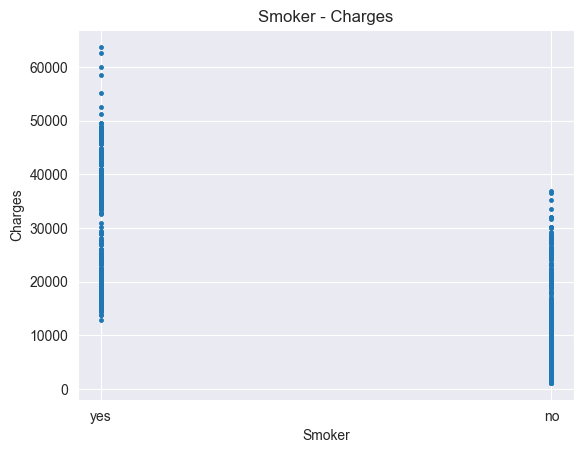

In [36]:
plt.scatter(df['smoker'], df['charges'], s=5)
plt.title("Smoker - Charges")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

The observations drawn from the scatter plot analysis reveal distinct patterns within the data. Notably, there are two evident clusters, delineating smokers and non-smokers. This stark division underscores the profound impact of smoking status on insurance charges, with smokers consistently displaying higher costs compared to non-smokers. Moreover, within each cluster, there exists notable variation, particularly among smokers, suggesting that factors beyond smoking, such as age, BMI, and comorbidities, also significantly influence individual insurance charges. Overall, the scatter plot confirms the hypothesis that smoking status is a crucial predictor of elevated medical expenses, emphasizing the necessity for insurers to incorporate smoking status into risk assessments and premium calculations. Additionally, it suggests that a holistic approach to risk assessment, encompassing various factors beyond smoking alone, would enhance the accuracy of insurance pricing models.

**Charges mean between smokers and non smokers**

In [37]:
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

mean_smoker_charges = smoker_charges.mean()
mean_non_smoker_charges = non_smoker_charges.mean()

print(f"Mean charges for smokers: {mean_smoker_charges}")
print(f"Mean charges for non-smokers: {mean_non_smoker_charges}")

Mean charges for smokers: 32223.139763617022
Mean charges for non-smokers: 8417.8744111404


The analysis reveals a significant discrepancy in insurance charges between smokers and non-smokers. On average, smokers face much higher costs, around
$32,223.14, compared to approximately \$8,417.87 for non-smokers. This stark contrast emphasizes the substantial financial risk associated with smoking, underscoring its critical role in insurance pricing and risk assessment.

The principal factor to medical expenses are smokers, with 79% correlation, followed by age with 30% correlation and bmi with 20%.

### **More Statistics**

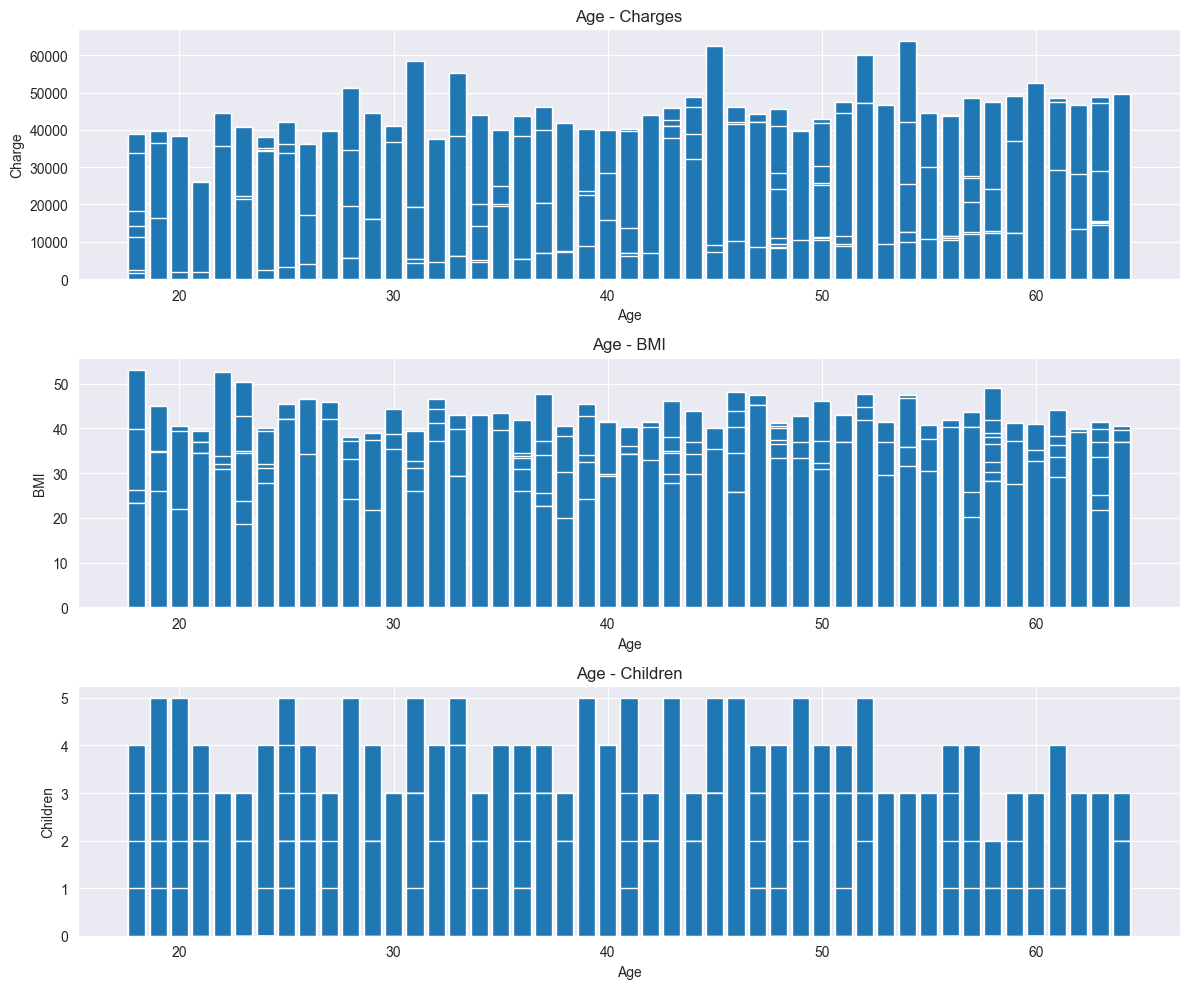

In [38]:
#subplots bar
fig, axs = plt.subplots(3, figsize=(12,10))

axs[0].bar(df['age'], df['charges'])
axs[0].set_title('Age - Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charge')

axs[1].bar(df['age'], df['bmi'])
axs[1].set_title('Age - BMI')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('BMI')

axs[2].bar(df['age'], df['children'])
axs[2].set_title('Age - Children')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Children')

plt.tight_layout()

plt.show()

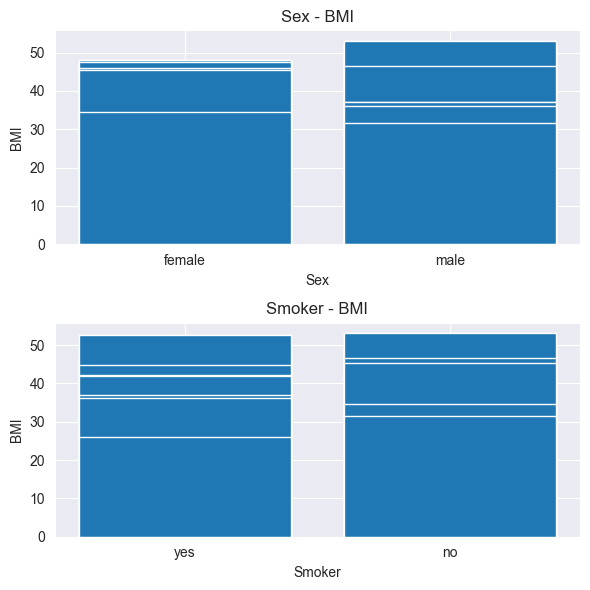

In [39]:
#subplots bar
fig, axs = plt.subplots(2, figsize=(6,6))

axs[0].bar(df['sex'], df['bmi'])
axs[0].set_title('Sex - BMI')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('BMI')

axs[1].bar(df['smoker'], df['bmi'])
axs[1].set_title('Smoker - BMI')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('BMI')

plt.tight_layout()

plt.show()

In [40]:
#female and male smokers
df.groupby(['smoker', 'sex']).size().unstack()

sex,female,male
smoker,,
no,1134,1074
yes,232,332


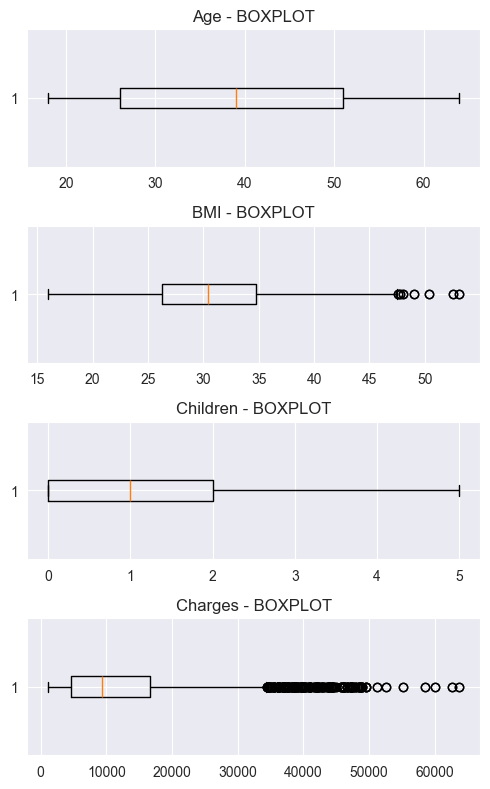

In [41]:
#subploits boxplots
fig, axs = plt.subplots(4, figsize=(5,8))

axs[0].boxplot(df['age'], vert=False)
axs[0].set_title('Age - BOXPLOT')

axs[1].boxplot(df['bmi'], vert=False)
axs[1].set_title('BMI - BOXPLOT')

axs[2].boxplot(df['children'], vert=False)
axs[2].set_title('Children - BOXPLOT')

axs[3].boxplot(df['charges'], vert=False)
axs[3].set_title('Charges - BOXPLOT')

plt.tight_layout()

plt.show()

The smokers make this Charges outliers, this will affect our model later, ill explain

# **Training and Testing Models**

## **To what extent do Machine Learning Models accurately predict medical expenses?**

**Import necessary models and libraries**

**Preprocessing**

In [42]:
categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
X_transformed = transformer.fit_transform(df.drop('charges', axis=1))
y = df['charges']

The dataset is transformed for machine learning by encoding categorical features using one-hot encoding, while numerical features remain unchanged. This prepares the data for model training, with the `charges` column as the target variable.

**Split the dataset into training and testing sets for regression**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

**Models for regression**

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
}


**Train and evaluate regression models**

In [45]:
print("Regression Models Evaluation:")
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2_score_model = r2_score(y_test, predictions)
    mse_score = mean_squared_error(y_test, predictions)
    mae_score = mean_absolute_error(y_test, predictions)

    print("Model:", name)
    print("R2 Score:", r2_score_model)
    print("MSE Score:", mse_score)
    print("MAE Score:", mae_score)
    print()

Regression Models Evaluation:
Model: Linear Regression
R2 Score: 0.7398453784767134
MSE Score: 39928780.32517332
MAE Score: 4153.978805657657

Model: Ridge Regression
R2 Score: 0.7397837206133643
MSE Score: 39938243.633057564
MAE Score: 4162.651223855458

Model: Decision Tree Regression
R2 Score: 0.9544770433010593
MSE Score: 6986906.9676383855
MAE Score: 526.1553911891892
Model: Random Forest Regression
R2 Score: 0.9514751344180119
MSE Score: 7447642.816363872
MAE Score: 1276.350599808594

Model: Gradient Boosting Regression
R2 Score: 0.8745359418641633
MSE Score: 19256343.733882822
MAE Score: 2304.7186285469547


Various regression models were evaluated for predicting insurance charges. Decision Tree and Random Forest Regression outperformed Linear and Ridge Regression, with higher R2 scores (0.95) and lower error metrics. Gradient Boosting Regression provided a balance between performance and error metrics, with an R2 score of 0.87.

**Preparing for classification**

In [46]:
df['charges_category'] = (df['charges'] > df['charges'].median()).astype(int)
y_categorical = df['charges_category']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_transformed, y_categorical, test_size=0.2, random_state=42)

The continuous variable `charges` is transformed into a binary categorical variable, `charges_category`, based on whether each value is above or below the median charge. This allows for a shift from regression to classification tasks, dividing the dataset into two balanced groups: above and below the median charges. With equal instances in each category, the dataset is split for training and testing classification models effectively, providing a simplified approach for insurance risk categorization based on a median threshold.

**Models for classification**

In [47]:
class_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classification": KNeighborsClassifier(),
    "SVM Classification": SVC(probability=True),
    "Naive Bayes Classification": GaussianNB()
}

**Train and evaluate classification models**

In [48]:
print("\nClassification Models Evaluation:")
for name, model in class_models.items():
    model.fit(X_train_cat, y_train_cat)
    if name == "SVM Classification":
        predictions = model.decision_function(X_test_cat)
    else:
        predictions = model.predict_proba(X_test_cat)[:, 1]
    accuracy = accuracy_score(y_test_cat, model.predict(X_test_cat))
    print(f"{name}: Accuracy = {accuracy:.2f}")


Classification Models Evaluation:
Logistic Regression: Accuracy = 0.92
KNN Classification: Accuracy = 0.87
SVM Classification: Accuracy = 0.81
Naive Bayes Classification: Accuracy = 0.69


Models were trained to classify individuals into two categories based on insurance charges: above or below the median. **Logistic Regression** achieved the highest accuracy (91.17%), followed by **KNN Classification** and **SVM Classification**. **Naive Bayes Classification** showed the lowest accuracy. **Logistic Regression**'s success indicates strong linear relationships, aiding effective risk-based categorization for insurance premium adjustments.

**ROC Curve Analysis**

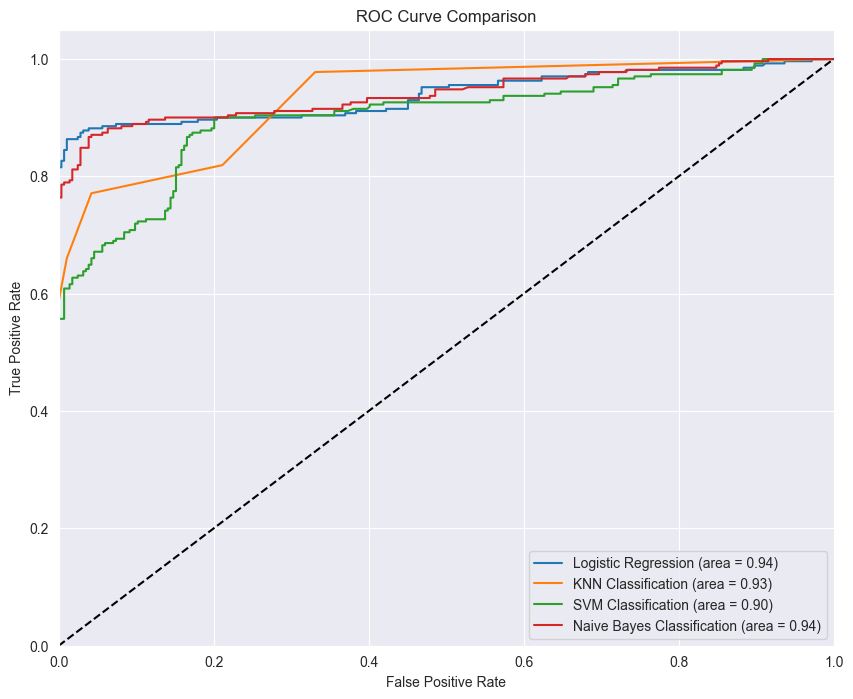

In [49]:
plt.figure(figsize=(10, 8))
for name, model in class_models.items():
    if name == "SVM Classification":
        predictions = model.decision_function(X_test_cat)
    else:
        predictions = model.predict_proba(X_test_cat)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_cat, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


The plot illustrates ROC curves for classifying insurance charges as above or below the median. **Logistic Regression** and **KNN Classification** show high AUC scores, indicating strong performance. **SVM Classification** performs slightly worse, while **Naive Bayes Classification** is weakest. **Logistic Regression** and **KNN Classification** effectively distinguish charge categories, underscoring their utility in insurance tasks.

## **New Instance Testing**

In [50]:
# User Input Function
def get_user_input():
    age = int(input("Enter age: "))
    sex = input("Enter sex (male/female): ")
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Enter smoker (yes/no): ")
    region = input("Enter region (southwest/southeast/northwest/northeast): ")

    return age, sex, bmi, children, smoker, region

# Get user input
age, sex, bmi, children, smoker, region = get_user_input()

# Create a sample input (like a DataFrame)
user_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Apply the same transformations
user_data_transformed = transformer.transform(user_data)

# Regression Predictions
print("\nRegression Predictions:")
for name, model in models.items():
    prediction = model.predict(user_data_transformed)[0]  # Get the single prediction
    print(f"{name}: Predicted charges: ${prediction:.2f}")

# Classification Predictions
print("\nClassification Predictions:")
for name, model in class_models.items():
    prediction = model.predict(user_data_transformed)[0]
    if prediction == 1:
        pred_class = "High charges"
    else:
        pred_class = "Low charges"
    print(f"{name}: Predicted category: {pred_class}")



Regression Predictions:
Linear Regression: Predicted charges: $1836.00
Ridge Regression: Predicted charges: $1767.29
Decision Tree Regression: Predicted charges: $2352.97
Random Forest Regression: Predicted charges: $3097.36
Gradient Boosting Regression: Predicted charges: $4289.20

Classification Predictions:
Logistic Regression: Predicted category: Low charges
KNN Classification: Predicted category: Low charges
SVM Classification: Predicted category: Low charges
Naive Bayes Classification: Predicted category: Low charges


The function `get_user_input()` collects user details like **age**, **sex**, **BMI**, etc., creating a DataFrame mimicking training data. This user data is preprocessed and fed into pre-trained **regression** and **classification models** for prediction. This approach offers personalized predictions and real-world applicability, enabling model evaluation on new data. It prompts user inputs for **insurance charge prediction** and categorizes them as **high** or **low** based on the median, providing tailored estimates and risk assessments.